In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#model processing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

#model deployment
import pickle


Preparing the dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving banksig.csv to banksig.csv


In [0]:
import io
banksig = pd.read_csv(io.BytesIO(uploaded['banksig.csv']))

In [0]:
banksig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
job_admin.                     41188 non-null int64
job_blue-collar                41188 non-null int64
job_entrepreneur               41188 non-null int64
job_retired                    41188 non-null int64
job_services                   41188 non-null int64
job_student                    41188 non-null int64
job_unemployed                 41188 non-null int64
marital_married                41188 non-null int64
marital_single                 41188 non-null int64
education_basic                41188 non-null int64
education_university.degree    41188 non-null int64
education_unknown              41188 non-null int64
default_no                     41188 non-null int64
default_unknown                41188 non-null int64
contact_cellular               41188 non-null int64
contact_telephone              41188 non-null int64
month_apr                      41188 non-null int64
month_d

In [0]:
banksig.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,56,1,0,93.994,-36.4,4.857
1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,57,1,0,93.994,-36.4,4.857
2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,37,1,0,93.994,-36.4,4.857
3,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,40,1,0,93.994,-36.4,4.857
4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,56,1,0,93.994,-36.4,4.857


In [6]:
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [0]:
bank = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']), delimiter = ';')

In [0]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
target = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [10]:
uploaded = files.upload()

Saving bank_oversampled.csv to bank_oversampled.csv


In [0]:
bank_oversampled = pd.read_csv(io.BytesIO(uploaded['bank_oversampled.csv']))

In [0]:
bank_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51140 entries, 0 to 51139
Data columns (total 32 columns):
job_admin.                     51140 non-null int64
job_blue-collar                51140 non-null int64
job_entrepreneur               51140 non-null int64
job_retired                    51140 non-null int64
job_services                   51140 non-null int64
job_student                    51140 non-null int64
job_unemployed                 51140 non-null int64
marital_married                51140 non-null int64
marital_single                 51140 non-null int64
education_basic                51140 non-null int64
education_university.degree    51140 non-null int64
education_unknown              51140 non-null int64
default_no                     51140 non-null int64
default_unknown                51140 non-null int64
contact_cellular               51140 non-null int64
contact_telephone              51140 non-null int64
month_apr                      51140 non-null int64
month_d

## Splitting the original dataset and prepare oversampled dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(banksig, target, test_size = 0.3, random_state = 101)

In [0]:
X_train_over = bank_oversampled.drop('y', axis = 1)
y_train_over = bank_oversampled['y']

## Preparing the basic model

In [0]:
log_reg = LogisticRegression()

In [0]:
xgb = XGBClassifier()

## Preparing for Hyperparameter Tuning -- using RandomizedSearchCV

In [0]:
# Logistic Regression

# C (float, default=1.0)
# Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.

# max_iter (int, default=100)
# Maximum number of iterations taken for the solvers to converge.

solver = ['saga']
max_iter = [1000, 1500, 2000, 3000]
penalty = ['l1', 'l2']
class_weight = [None, 'balanced']
C = [0.01, 0.1, 1, 10,]

log_reg_param = {'solver': solver,
                 'max_iter': max_iter,
                 'penalty': penalty,
                 'class_weight': class_weight,
                 'C': C}

In [0]:
# randomized

log_random_ori = RandomizedSearchCV(estimator = log_reg,
                              param_distributions = log_reg_param,
                              n_iter = 15, cv =5, n_jobs = -1, scoring = 'f1')

In [0]:
# Scaling the dataset 
scaler = StandardScaler()

In [0]:
#-- original data
X_trainscale = scaler.fit_transform(X_train)
X_testscale = scaler.transform(X_test)

In [0]:
log_random_ori

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [1000, 1500, 2000, 3000],
                                        'penalty': ['l1', 'l2'],

In [0]:
log_random_ori.fit(X_trainscale, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [1000, 1500, 2000, 3000],
                                        'penalty': ['l1', 'l2'],

In [0]:
log_random_ori.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'max_iter': 1500,
 'penalty': 'l1',
 'solver': 'saga'}

In [0]:
log_random_ori.best_score_

0.4340365439339566

In [0]:
# Let's try to use this hyperparameter to predict our test set

# log_model_ori = LogisticRegression(class_weight = 'balanced', max_iter = 2000, penalty = 'l2', solver = 'saga')

In [0]:
# log_model_ori.fit(X_trainscale, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting the train set
log_pred_train = log_random_ori.predict(X_trainscale)

In [0]:
f1_score(y_train, log_pred_train)

0.43632125450307263

In [0]:
print(classification_report(y_train, log_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     25570
           1       0.33      0.63      0.44      3261

    accuracy                           0.82     28831
   macro avg       0.64      0.74      0.66     28831
weighted avg       0.88      0.82      0.84     28831



In [0]:
print(confusion_matrix(y_train, log_pred_train))

[[21452  4118]
 [ 1202  2059]]


In [0]:
# Now predicting the test set
log_pred_test = log_random_ori.predict(X_testscale)

In [0]:
f1_score(y_test, log_pred_test)

0.4230573895378365

In [0]:
print(confusion_matrix(y_test, log_pred_test))

[[9252 1726]
 [ 546  833]]


In [0]:
print(classification_report(y_test, log_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10978
           1       0.33      0.60      0.42      1379

    accuracy                           0.82     12357
   macro avg       0.63      0.72      0.66     12357
weighted avg       0.88      0.82      0.84     12357



In [0]:
y_train.value_counts()

0    25570
1     3261
Name: y, dtype: int64

In [0]:
y_test.value_counts()

0    10978
1     1379
Name: y, dtype: int64

In [0]:
y_train_over.value_counts()

1    25570
0    25570
Name: y, dtype: int64

In [0]:
# -- Oversampled data

log_random_over = RandomizedSearchCV(estimator = log_reg,
                              param_distributions = log_reg_param,
                              n_iter = 15, cv =5, n_jobs = -1, scoring = 'f1')

In [0]:
X_train_overscale = scaler.fit_transform(X_train_over)

In [0]:
log_random_over.fit(X_train_overscale, y_train_over)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [1000, 1500, 2000, 3000],
                                        'penalty': ['l1', 'l2'],

In [0]:
log_random_over.best_params_

{'C': 0.01,
 'class_weight': None,
 'max_iter': 3000,
 'penalty': 'l2',
 'solver': 'saga'}

In [0]:
log_random_over.best_score_

0.7058015284059053

In [0]:
# Let's use the best hyperparameter generated by randomized search
# log_over_model = LogisticRegression(class_weight = 'balanced', max_iter = 2000, penalty = 'l2', solver = 'saga')

In [0]:
# log_over_model.fit(X_train_overscale, y_train_over)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X_test_overscale = scaler.transform(X_test)

In [0]:
log_over_train = log_random_over.predict(X_train_overscale)

In [0]:
f1_score(y_train_over, log_over_train)

0.7053270397842213

In [0]:
print(classification_report(y_train_over, log_over_train))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     25570
           1       0.79      0.63      0.71     25570

    accuracy                           0.74     51140
   macro avg       0.75      0.74      0.73     51140
weighted avg       0.75      0.74      0.73     51140



In [0]:
print(confusion_matrix(y_train_over, log_over_train))

[[21380  4190]
 [ 9357 16213]]


In [0]:
log_over_test = log_random_over.predict(X_test_overscale)

In [0]:
f1_score(y_test, log_over_test)

0.424867858041782

In [0]:
print(classification_report(y_test, log_over_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10978
           1       0.33      0.61      0.42      1379

    accuracy                           0.82     12357
   macro avg       0.64      0.73      0.66     12357
weighted avg       0.88      0.82      0.84     12357



In [0]:
print(confusion_matrix(y_test, log_over_test))

[[9228 1750]
 [ 535  844]]


> After RandomizedsearchCV, we got a best hyperparameter for now and we can see that the f1 score is increasing quite high, compared to the model without hyperparameter tuning. Before hyperparameter tuning, in the original datasets we got f1 scores only 0.30 for both train and test dataset. But now we increased the f1 scores until 0.42 for the test set, and we also got better True Positive results, compared to False negatives.

> However using the oversampled dataset did not really increase the f1 score, the predicted true positive for our Target Yes only increased 10 observations compared to the original dataset. Moreover, we saw the tendency of overfitting when we fit the model into the oversampled dataset, similar with what we observed without hyperparameter tuning. In the original dataset, the recall is better than the precision in the test set, and it is also proved that the model can predict true positives more often than the false negative.

> It seems like logistic regression model with hyperparameter tuning behaves better if we fit into the original dataset.

> <b>In Logistic Regression, the F1 score for : </b>
* Original data : 0.44 (train), 0.42 (test)
* Oversampled data : 0.71 (train), 0.42 (test)


Hyperparameter Tuning for XGBoostClassifier

In [0]:
param_learning = (0.05, 0.1, 0.15, 0.2, 0.3, 0.5)
param_estimator = (100, 200, 250, 350, 500, 1000, 1500)
max_depth = (3, 4, 5, 6)

xgbparam_grid = {'learning_rate': param_learning, 'n_estimators':param_estimator,
'max_depth' : max_depth}

In [0]:
xgb_random = RandomizedSearchCV(estimator = xgb,
                              param_distributions = xgbparam_grid,
                              n_iter = 15, cv =5, n_jobs = -1, scoring = 'f1')

In [42]:
#fitting into original dataset first
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [43]:
xgb_random.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 1000}

In [44]:
xgb_random.best_score_

0.3802295740124076

In [0]:
# try to predict the train set

xgb_train_ori = xgb_random.predict(X_train)

In [46]:
f1_score(y_train, xgb_train_ori)

0.715592832634388

In [47]:
print(classification_report(y_train, xgb_train_ori))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25570
           1       0.95      0.58      0.72      3261

    accuracy                           0.95     28831
   macro avg       0.95      0.79      0.84     28831
weighted avg       0.95      0.95      0.94     28831



In [48]:
print(confusion_matrix(y_train, xgb_train_ori))

[[25462   108]
 [ 1384  1877]]


In [0]:
# Predicting the test set

xgb_test_ori = xgb_random.predict(X_test)

In [50]:
f1_score(y_test, xgb_test_ori)

0.37243267914194433

In [51]:
print(confusion_matrix(y_test, xgb_test_ori))

[[10574   404]
 [  971   408]]


In [52]:
print(classification_report(y_test, xgb_test_ori))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10978
           1       0.50      0.30      0.37      1379

    accuracy                           0.89     12357
   macro avg       0.71      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [53]:
# Fitting into the oversampled dataset

xgb_random.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [54]:
xgb_random.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1500}

In [55]:
xgb_random.best_score_

0.9251386052475427

In [0]:
## Predicting the train set

xgb_train_over = xgb_random.predict(X_train_over)

In [57]:
f1_score(y_train_over, xgb_train_over)

0.966193478513132

In [58]:
print(classification_report(y_train_over, xgb_train_over))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     25570
           1       0.96      0.98      0.97     25570

    accuracy                           0.97     51140
   macro avg       0.97      0.97      0.97     51140
weighted avg       0.97      0.97      0.97     51140



In [59]:
print(confusion_matrix(y_train_over, xgb_train_over))

[[24413  1157]
 [  591 24979]]


In [0]:
xgb_test_over = xgb_random.predict(X_test)

In [61]:
f1_score(y_test, xgb_test_over)

0.3668039277795376

In [62]:
print(confusion_matrix(y_test, xgb_test_over))

[[9779 1199]
 [ 800  579]]


In [63]:
print(classification_report(y_test, xgb_test_over))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10978
           1       0.33      0.42      0.37      1379

    accuracy                           0.84     12357
   macro avg       0.63      0.66      0.64     12357
weighted avg       0.86      0.84      0.85     12357



> The F1 Scores for the original dataset increased for the training set, however the score in the test set is not improved. The recall is also lower than the precision. 

> In the oversampled dataset, we saw a really high F1 score for the train set. Unfortunately it did not perform well for the test set (even when we already increased the n_estimators). But this indicates that the model overfits.

> However, probably this is the case here, that the hyperparameter tuning is not optimal, thus we do not see a boosted performance.

> <b>In XGB, the F1 score for : </b>
* Original data : 0.72 (train), 0.37 (test)
* Oversampled data : 0.97(train), 0.37 (test)

Now I will keep the hyperparameter for logistic regression (original dataset), and XGBClassifier (oversampled dataset)

In [0]:
# initiate the model
log_reg = LogisticRegression(solver = 'saga', penalty = 'l1', class_weight = 'balanced', max_iter = 1500, C = 1)

xgb = XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 1500)

## More about features

In [0]:
# Logistic Regression
# using the original dataset

X_trainscale = scaler.fit_transform(X_train)
X_testscale = scaler.transform(X_test)

In [66]:
log_reg.fit(X_trainscale, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
log_reg.coef_

array([[ 0.00794867, -0.03856659,  0.00787485,  0.08408738, -0.04412931,
         0.0520174 , -0.00727855,  0.01423475,  0.03301351,  0.01863539,
         0.04306209,  0.01817831,  0.09290619,  0.        ,  0.10286255,
        -0.10286255, -0.00588992,  0.03553421,  0.12055098,  0.15045648,
        -0.30416448,  0.08730154, -0.02310798, -0.07179596, -0.02474687,
        -0.02236055, -0.1512306 ,  0.02945317,  0.38617733,  0.27469268,
        -1.06005807]])

In [0]:
log_regcoef = list(log_reg.coef_[0])

In [69]:
len(log_regcoef)

31

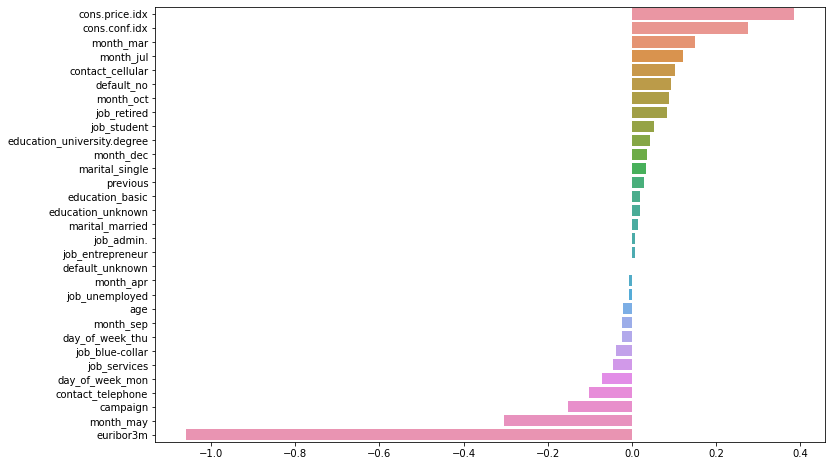

In [71]:
## Plotting based on the log_reg default feature coefficients

plt.figure(figsize=(12,8))
log_coef=pd.Series(log_regcoef,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=log_coef,y=log_coef.index)

> Based on the coefficients here, we can see which features are the one influencing the probability/tendency of a customers to be in Target Yes. Two socio-economic features are at the top: cons.price.idx and cons.conf.idx, while the bottom one in the last socio-economic feature: euribor3m. Features' coefficient which are more than 0 positively increase the likelihood of customers to be in Target Yes, for example people are more likely to accept the offer in March, in line with what we saw in EDA. While we saw in the bottom is month_may, although most people are contacted in this month, but it seems like it actually decrease the probability to be in Target Yes.

In [74]:
#let's see the feature importance using other method -- Permutation Importance

import warnings
warnings.filterwarnings('ignore')

from eli5 import show_weights
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [73]:
pip install eli5

     |████████████████████████████████| 112kB 1.4MB/s 


In [75]:
#let's see the feature importance in the train data
log_perm = PermutationImportance(log_reg, scoring = 'f1').fit(X_trainscale, y_train)
show_weights(log_perm, feature_names = list(X_train.columns))

Weight,Feature
0.2329 ± 0.0053,euribor3m
0.0595 ± 0.0013,cons.price.idx
0.0524 ± 0.0028,cons.conf.idx
0.0440 ± 0.0039,month_may
0.0102 ± 0.0012,month_mar
0.0100 ± 0.0030,month_jul
0.0041 ± 0.0015,month_oct
0.0028 ± 0.0009,job_retired
0.0014 ± 0.0012,job_blue-collar
0.0011 ± 0.0010,day_of_week_thu


In [76]:
#let's see the feature importance in the test data
log_perm_test = PermutationImportance(log_reg, scoring = 'f1').fit(X_testscale, y_test)
show_weights(log_perm_test, feature_names = list(X_test.columns))

Weight,Feature
0.2237 ± 0.0089,euribor3m
0.0524 ± 0.0050,cons.price.idx
0.0480 ± 0.0026,cons.conf.idx
0.0388 ± 0.0040,month_may
0.0102 ± 0.0025,month_mar
0.0084 ± 0.0050,month_jul
0.0039 ± 0.0013,month_oct
0.0010 ± 0.0015,day_of_week_thu
0.0008 ± 0.0015,job_retired
0.0008 ± 0.0014,education_unknown


> According to the permutation importance method, the features which are considered important here are the socio-economic features (the top 3), with the most important is the euribor3m.

In [77]:
xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
# Now let's see the feature importance in XGB model
perm_xgb = PermutationImportance(xgb, scoring = 'f1', random_state = 101).fit(X_test, y_test)
show_weights(perm_xgb, feature_names = list(X_test.columns))

Weight,Feature
0.1936 ± 0.0114,euribor3m
0.0364 ± 0.0069,cons.conf.idx
0.0308 ± 0.0028,contact_cellular
0.0114 ± 0.0079,age
0.0097 ± 0.0055,month_may
0.0095 ± 0.0023,month_oct
0.0080 ± 0.0014,previous
0.0074 ± 0.0069,default_no
0.0070 ± 0.0111,campaign
0.0024 ± 0.0022,day_of_week_thu


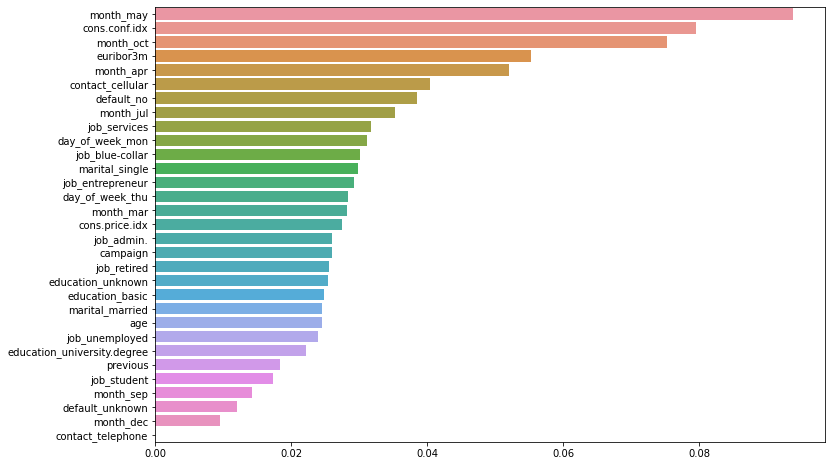

In [79]:
## Plotting based on the xgboost default feature importance

plt.figure(figsize=(12,8))
importance=pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=importance,y=importance.index)

> Here XGB considered that month_may is the most important feature for our classification model. cons.conf.idx is also considered important. XGB considered all features, but one (contact telephone) as positive features to aid in classification.

## Model Stability -- using KFold and Cross Validation

Unfortunately I do not have the luxury of time and resources to check all the models. Thus for now I will stick to logistic regression in original dataset.

In [0]:
# Making metrics functions first

def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confmatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confmatrix,
        'logloss': logloss
    }
  
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confmatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confmatrix,
        'logloss': logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [0]:
# For Logistic Regression

k = 5
kf_log = KFold(n_splits = k, shuffle = True, random_state = 101)

In [0]:
bank_scale = scaler.fit_transform(banksig)

In [0]:
bank_scale1 = pd.DataFrame(bank_scale, columns = banksig.columns)

In [0]:
res_fold_log = list(kf_log.split(bank_scale, target))

In [85]:
bank_scale1.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic,education_university.degree,education_unknown,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,-0.582023,-0.538317,-0.19143,-0.208757,-0.326556,-0.147327,-0.158872,0.807638,-0.624938,1.513809,-0.647531,-0.209453,0.513713,-0.513600,-1.31827,1.31827,-0.261274,-0.066621,-0.459253,-0.115907,1.411155,-0.133197,-0.118462,1.959,-0.514581,1.533034,-0.565922,-0.349494,0.722722,0.886447,0.71246
1,-0.582023,-0.538317,-0.19143,-0.208757,3.062258,-0.147327,-0.158872,0.807638,-0.624938,-0.660585,-0.647531,-0.209453,-1.946613,1.947042,-1.31827,1.31827,-0.261274,-0.066621,-0.459253,-0.115907,1.411155,-0.133197,-0.118462,1.959,-0.514581,1.628993,-0.565922,-0.349494,0.722722,0.886447,0.71246
2,-0.582023,-0.538317,-0.19143,-0.208757,3.062258,-0.147327,-0.158872,0.807638,-0.624938,-0.660585,-0.647531,-0.209453,0.513713,-0.513600,-1.31827,1.31827,-0.261274,-0.066621,-0.459253,-0.115907,1.411155,-0.133197,-0.118462,1.959,-0.514581,-0.290186,-0.565922,-0.349494,0.722722,0.886447,0.71246
3,1.718146,-0.538317,-0.19143,-0.208757,-0.326556,-0.147327,-0.158872,0.807638,-0.624938,1.513809,-0.647531,-0.209453,0.513713,-0.513600,-1.31827,1.31827,-0.261274,-0.066621,-0.459253,-0.115907,1.411155,-0.133197,-0.118462,1.959,-0.514581,-0.002309,-0.565922,-0.349494,0.722722,0.886447,0.71246
4,-0.582023,-0.538317,-0.19143,-0.208757,3.062258,-0.147327,-0.158872,0.807638,-0.624938,-0.660585,-0.647531,-0.209453,0.513713,-0.513600,-1.31827,1.31827,-0.261274,-0.066621,-0.459253,-0.115907,1.411155,-0.133197,-0.118462,1.959,-0.514581,1.533034,-0.565922,-0.349494,0.722722,0.886447,0.71246


In [86]:
len(res_fold_log[0][1])

8238

In [0]:
train_errors = []
valid_errors = []

for train_index, val_index in kf_log.split(bank_scale1,target):
    
    #split data
    X_trn, X_val = bank_scale1.iloc[train_index], bank_scale1.iloc[val_index]
    y_trn, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model -- taking the one with the best hyperparameter according to the randomsearch
    log_reg = LogisticRegression(solver = 'saga', penalty = 'l1', class_weight = 'balanced', max_iter = 1500, C = 1)

    #Scaling our X_train_log and X_val_log
    # X_tr_scale = scaler.fit_transform(X_train_log)
    # X_val_scale = scaler.transform(X_val_log)


    #calculate error
    train_error, valid_error = calc_metrics(X_trn, y_trn, X_val, y_val, log_reg)
    
    #append to appropriate list
    train_errors.append(train_error)
    valid_errors.append(valid_error)

In [88]:
matrix  = []
for i, j in zip(train_errors, valid_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'], i['f1'], j['f1'], 
                   i['matthew'], j['matthew'], i['logloss'], j['logloss']])

calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC',
                                             'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef', 
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.814598,0.815853,0.789534,0.776590,0.431351,0.432048,0.358756,0.352332,0.535469,0.532595
2 Iteration,0.811320,0.810876,0.789386,0.776086,0.434767,0.404889,0.360348,0.333465,0.534200,0.538476
3 Iteration,0.817936,0.812090,0.785140,0.792198,0.436449,0.423249,0.362023,0.351669,0.537955,0.543695
4 Iteration,0.811356,0.814253,0.784942,0.791942,0.425296,0.444041,0.351540,0.368961,0.539110,0.535113
5 Iteration,0.811113,0.812189,0.785813,0.788000,0.426148,0.440506,0.352210,0.367067,0.538205,0.538517
Average,0.813265,0.813052,0.786963,0.784963,0.430802,0.428947,0.356975,0.354698,0.536988,0.537679


> Here we can see that actually the model is quite stable. The values for each evaluation score did not fluctuate extremely.

Cross validation scores: [0.42365591 0.40709812 0.43220339 0.43762781 0.45707915 0.44557477
 0.4265506  0.43769634 0.43640351 0.44262295]


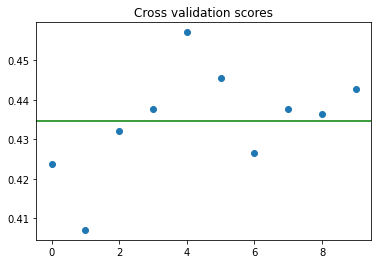

In [89]:
# from sklearn.model_selection import cross_val_score

# X_trainscale = scaler.fit_transform(X_train_log)
scores = cross_val_score(estimator=log_reg,
                        X=X_trainscale,
                        y=y_train,
                        cv=10, 
                        n_jobs=1,
                        scoring = 'f1')

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

> Here I also checked the f1 score using CV method. Here we can see that the f1 score is fluctuating, but not really far away (it is still within 0.40 something)